# 決定木(回帰)の仕組

## 目的
* 複雑な意思決定プロセスを木構造で表現し、意思決定に活用できる「決定木」について理解する。  
* 特に『連続的な値』の予測ができる **回帰モデル（回帰木）** の仕組みを学ぶ。

---

## 決定木とは

### 概要
決定木（Decision Tree）は、  
**データの特徴量に基づいて条件分岐を行い、最終的な出力（予測値）を導くアルゴリズム**。  
人間が直感的に理解しやすい「if〜then〜」ルールの集合として表現される。

木構造の各要素は以下のように構成される：

| 要素 | 内容 |
|:--|:--|
| **根ノード（Root Node）** | 最初の分岐を行う基点。全データを含む。 |
| **内部ノード（Internal Node）** | 特定の特徴量の値でデータを分割する条件を表す。 |
| **葉ノード（Leaf Node）** | 分割の終点。予測値を保持する。 |

---

## 回帰木

回帰木（Regression Tree）は、  
**連続値（数値データ）を予測するための決定木モデル**。

1. **特徴量と分割点を探索**  
   各特徴量について、データをある値で分けたときの「誤差（ばらつき）」が最も小さくなる分割点を探す。

2. **分割の評価**  
   データができるだけ均質（同じような値が集まる）になるように分ける。  
   これを繰り返して木を深くしていく。

3. **予測の仕組み**  
   新しいデータが与えられると、条件分岐をたどって葉ノードに到達し、  
   そのノードに含まれる訓練データの**平均値**を予測値として出力する。

4. **特徴**  
   - 非線形関係をうまく表現できる  
   - 外れ値に比較的強い  
   - 直感的に理解しやすい  
   - ただし「学習データの範囲外（外挿）」の予測は苦手

---

## 決定木の長所と短所

### 長所
- モデルの仕組みが直感的で分かりやすい  
- 前処理（スケーリングや正規化）がほとんど不要  
- 数値データ・カテゴリデータの両方に対応可能  
- 非線形関係を自然に扱える  
- 特徴量の重要度を確認しやすい  

### 短所
- 分割を細かくしすぎると過学習しやすい  
- データのわずかな変化で構造が大きく変わることがある  
- 外挿（学習範囲外の値）に弱い  
- 単体では予測精度が安定しにくい  

---

## 発展：ランダムフォレストと勾配ブースティング

### ランダムフォレスト（Random Forest）
- **多数の決定木を組み合わせたアンサンブル学習手法**。  
- 各木が異なるサンプルや特徴量で学習し、最終的に予測結果を平均化することで、  
  単一の決定木よりも**安定して高精度**な予測ができる。  
- 過学習を抑え、汎化性能を向上させる効果がある。

### 勾配ブースティング（Gradient Boosting）
- **弱い決定木を段階的に積み重ねて誤差を修正していく手法**。  
- 各木は前の木が苦手としたデータに重点を置いて学習する。  
- 学習を繰り返すことで高い精度を実現できるが、  
  パラメータ調整がやや難しく、学習コストが高くなる傾向がある。

---

## まとめ
- 決定木は「ルールベースで予測する」直感的なモデル。  
- 回帰木は連続値の予測に適しているが、外挿や過学習には注意が必要。  
- ランダムフォレストや勾配ブースティングは、  
  決定木をベースにした**高精度な派生モデル**として実務で広く活用されている。

---

# 決定木（回帰木）で学ぶ「気温とアイスの売り上げ」予測

## 1. 導入（目的の説明）
このノートブックでは、気温とアイスの売り上げの関係を例に、
回帰木（Regression Tree）の仕組みを視覚的に理解します。

目的：
- 気温と売上データを使って回帰木を学習する  
- 木の分岐ルールと予測の仕組みを可視化する  
- 外挿が苦手な点を確認する 

## 2. データの準備

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 仮想データ
# 気温リスト(-3〜30度)
temperature = np.linspace(-3, 30, 34)
# -3~-1度の売上(すべて10)
sales_1 = np.full(3, 10)
# 0~5度の売上(すべて2)
sales_2 = np.full(6, 2)
# 25~30度の売上(すべて30)
sales_3 = np.full(6, 30)
# 6~24度の売上(6~30を徐々に増加)
sales_4 = np.linspace(6, 30, 19)
# 売上リストの結合
sales = np.concatenate([sales_1, sales_2, sales_4, sales_3])
df = pd.DataFrame({'temperature': temperature, 'sales': sales})

## 3. データ可視化

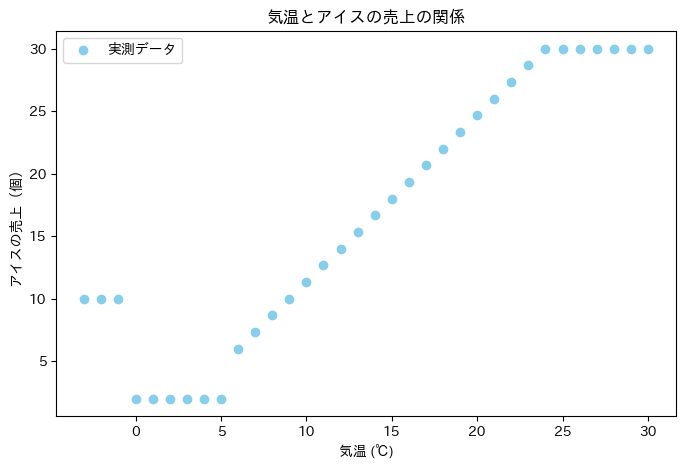

In [227]:
plt.figure(figsize=(8, 5))
plt.scatter(df["temperature"], df["sales"], color="skyblue", label="実測データ")
plt.xlabel("気温 (℃)")
plt.ylabel("アイスの売上（個）")
plt.title("気温とアイスの売上の関係")
plt.legend()
plt.show()

## 4. 回帰木モデルの学習

In [228]:
# --- 4. 回帰木モデルの学習 ---
# 決定木回帰器を作成（max_depth=3で浅めに設定）
model = DecisionTreeRegressor(max_depth=3, random_state=42)
X = df[['temperature']]
y = df['sales']

# モデルを学習
model.fit(X, y)

# 予測用の気温レンジを作成（学習範囲外も含む）
temperature_test = np.linspace(-5, 35, 100).reshape(-1,1)
sales_pred = model.predict(temperature_test)

c:\Users\tsuki\myrepo\my-analysis-knowledge\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


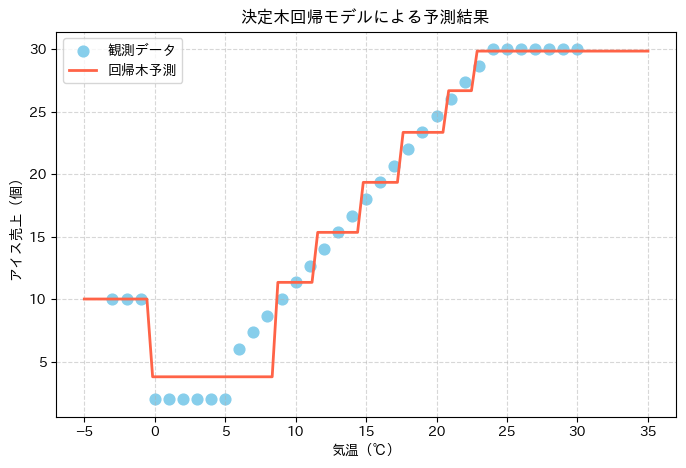

In [229]:
# --- 5. 回帰木による予測の可視化 ---
plt.figure(figsize=(8,5))
plt.scatter(df['temperature'], df['sales'], color='skyblue', s=60, label='観測データ')
plt.plot(temperature_test, sales_pred, color='tomato', linewidth=2, label='回帰木予測')
plt.xlabel('気温（℃）')
plt.ylabel('アイス売上（個）')
plt.title('決定木回帰モデルによる予測結果')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

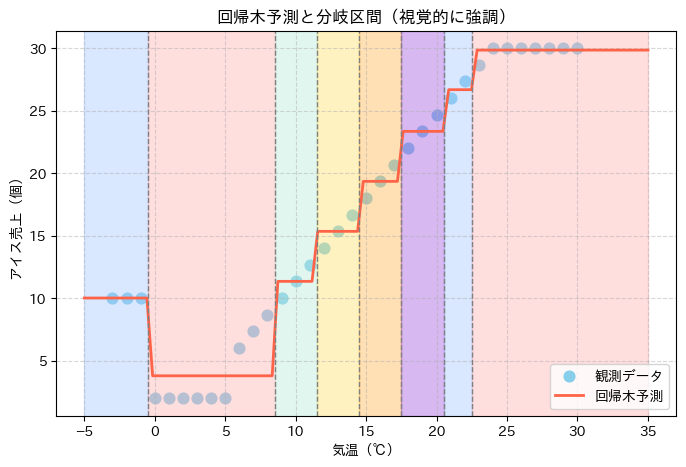

In [230]:
# --- 5. 改良版: 視覚的に分かりやすく色を変えて背景を塗る ---

plt.figure(figsize=(8,5))
plt.scatter(df['temperature'], df['sales'], color='skyblue', s=60, label='観測データ')
plt.plot(temperature_test, sales_pred, color='tomato', linewidth=2, label='回帰木予測')

# 決定木の分岐点を取得
thresholds = []

def get_thresholds(tree, node=0):
    left = tree.tree_.children_left[node]
    right = tree.tree_.children_right[node]
    if left != -1 and right != -1:
        thresholds.append(tree.tree_.threshold[node])
        get_thresholds(tree, left)
        get_thresholds(tree, right)

get_thresholds(model)
thresholds = sorted(thresholds)

# 背景色を区間ごとに設定（濃く、見やすい色）
colors = ['#a0c4ff', '#ffadad', '#b5ead7', '#ffe066', '#ffb347', '#9d4edd']  # 必要な数だけ用意
x_edges = [temperature_test.min()] + thresholds + [temperature_test.max()]

for i in range(len(x_edges)-1):
    color = colors[i % len(colors)]
    plt.axvspan(x_edges[i], x_edges[i+1], color=color, alpha=0.4)

# 分岐点に縦線を追加してどこで区間が分かれているかを強調
for t in thresholds:
    plt.axvline(t, color='gray', linestyle='--', linewidth=1)

plt.xlabel('気温（℃）')
plt.ylabel('アイス売上（個）')
plt.title('回帰木予測と分岐区間（視覚的に強調）')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

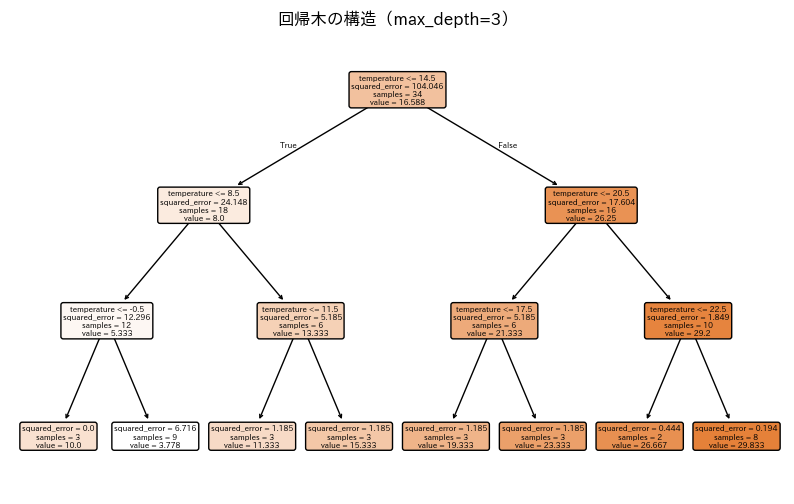

In [231]:
# --- 6. 決定木の構造を可視化 ---
# 各分岐ルールと葉ノードの予測値を確認
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['temperature'], filled=True, rounded=True)
plt.title('回帰木の構造（max_depth=3）')
plt.show()

c:\Users\tsuki\myrepo\my-analysis-knowledge\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\tsuki\myrepo\my-analysis-knowledge\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


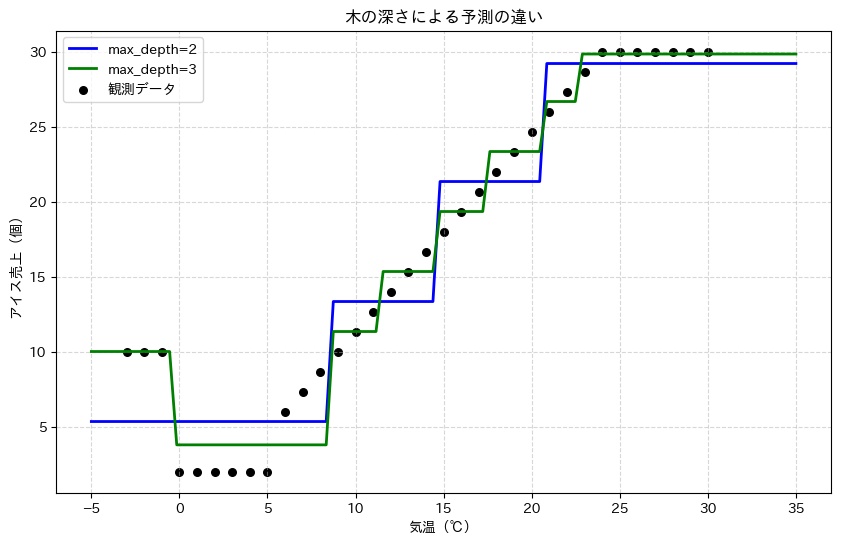

In [232]:
# --- 7. 木の深さによる予測の違い ---
# 木の深さによる予測の違い
depth_list = [2, 3]  # Noneは制限なし
colors = ['blue', 'green', 'red']  # 線の色を分ける

plt.figure(figsize=(10,6))

for depth, color in zip(depth_list, colors):
    temp_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    temp_model.fit(X, y)
    temp_pred = temp_model.predict(temperature_test)
    label = f'max_depth={depth}' if depth is not None else 'max_depth=None'
    plt.plot(temperature_test, temp_pred, color=color, label=label, linewidth=2)

# 観測データもプロット
plt.scatter(df['temperature'], df['sales'], color='black', s=30, label='観測データ')
plt.xlabel('気温（℃）')
plt.ylabel('アイス売上（個）')
plt.title('木の深さによる予測の違い')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

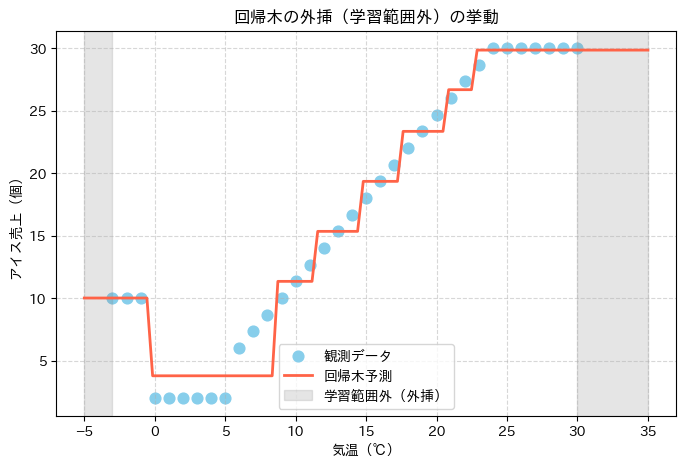

In [233]:
# --- 8. 外挿の確認 ---
# 学習範囲外の予測は端の値をそのまま出力する
plt.figure(figsize=(8,5))
plt.scatter(df['temperature'], df['sales'], color='skyblue', s=60, label='観測データ')
plt.plot(temperature_test, sales_pred, color='tomato', linewidth=2, label='回帰木予測')

# 学習範囲外をグレーでハイライト
plt.axvspan(-5, -3, color='gray', alpha=0.2, label='学習範囲外（外挿）')
plt.axvspan(30, 35, color='gray', alpha=0.2)

plt.xlabel('気温（℃）')
plt.ylabel('アイス売上（個）')
plt.title('回帰木の外挿（学習範囲外）の挙動')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 🔹 分岐条件の決定方法（回帰木）

## 1. 回帰木では何をしているのか
- 回帰木は、データを「似た値のグループ」に分けて予測値を決めるモデル
- 木の「枝分かれ」は、ある特徴量（ここでは気温）をある値で分割することで決まる
- 各分割の目的は「予測誤差を最小化すること」

---

## 2. 分岐条件の基本的な考え方
- 各ノードで、全ての可能な分割点（特徴量の値）を試す
- 分割後の左右のグループの「ばらつき」を計算
- ばらつきが最も減る分割を採用する

> 例：気温とアイス売上の場合  
> - 左：気温 ≤ 5℃  
> - 右：気温 > 5℃  
> この分け方で、それぞれのグループの売上のばらつきが最小になる

---

## 3. ばらつきの指標
- 回帰木では一般に **平均二乗誤差（MSE）** を使う
- ノード内のデータの「売上と平均売上の差の二乗和」が小さくなる分割が良い
- 数式は難しいので直感的には：
  - 「左右のグループの売上がなるべく均一」になる分割を選ぶ

---

## 4. 再帰的に分割
- 一番良い分割を決めたら、左右のノードに対して同じ手順を繰り返す
- これを「葉ノードが十分小さくなる」まで続ける
- この再帰的分割で木構造が完成する

---

In [234]:
# 分岐点メモリスト
thresholds_memo = []


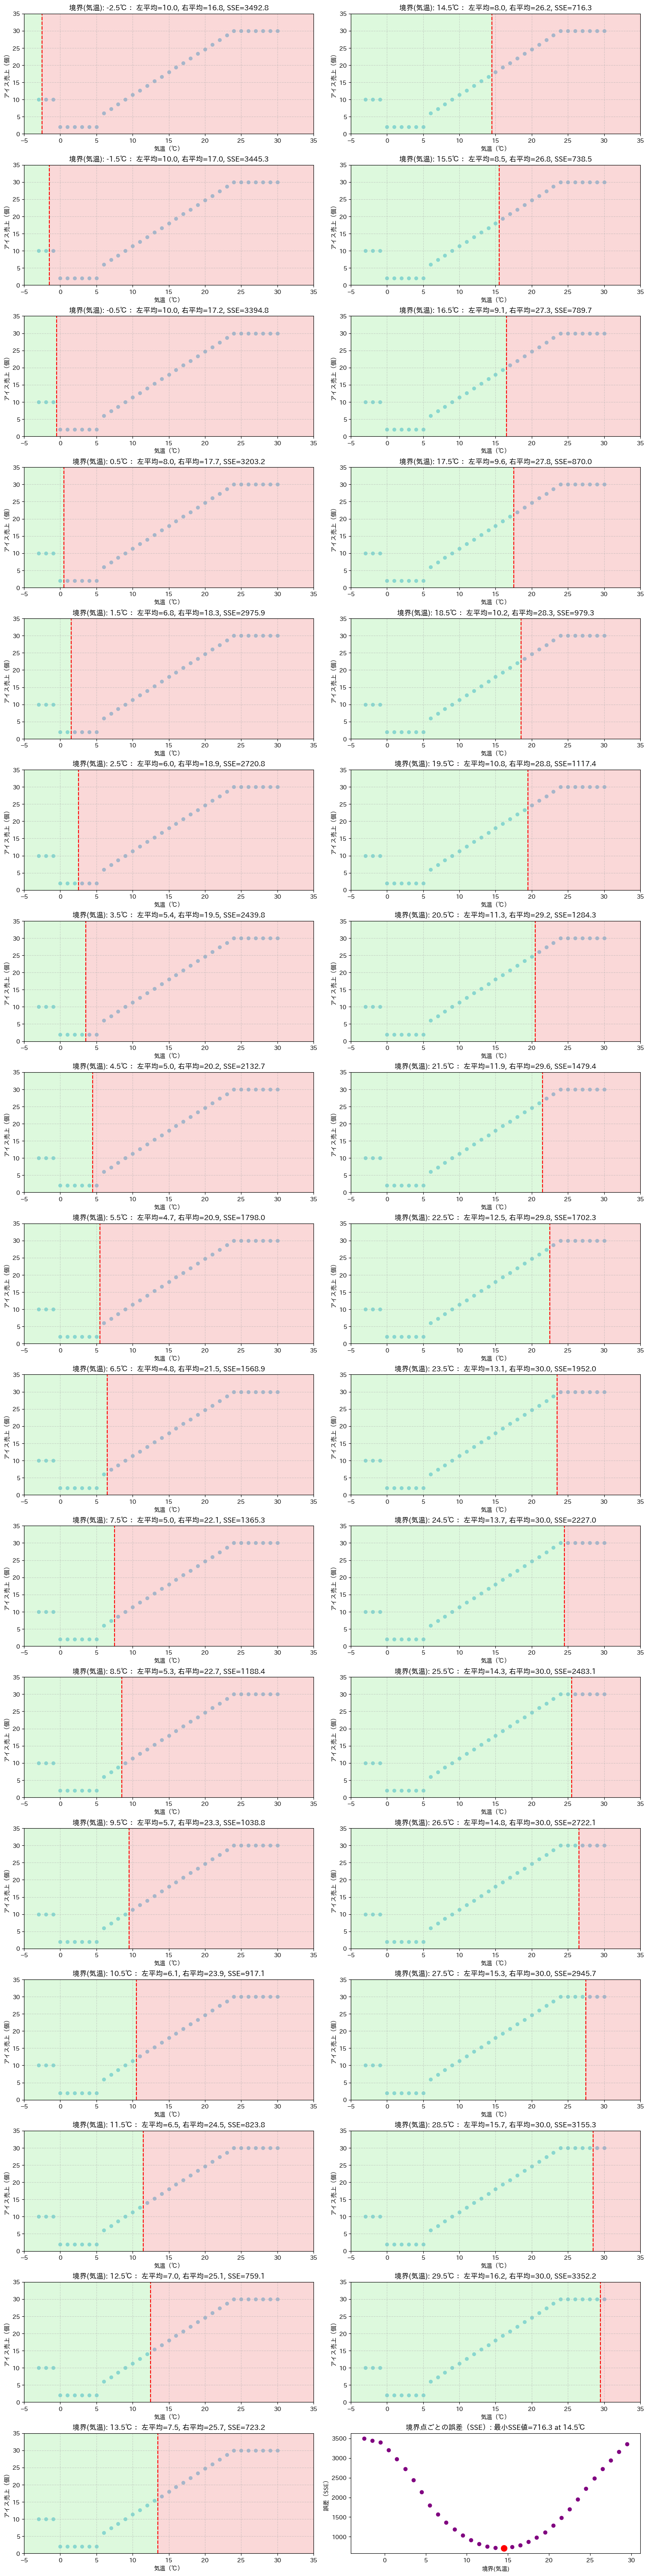

In [235]:
# 一つの分岐条件を視覚的に理解するための図

## 気温データ数
num_data = len(df)

fig, ax = plt.subplots(17, 2, figsize=(15, 60), constrained_layout=True)

thresholds = []
SSE_list = []
for i in range(num_data-1):
    # 図のインデックス
    row = i % 17
    col = i // 17
    ax[row][col].scatter(df['temperature'], df['sales'], color='skyblue', s=30)
    # 境界点:i番目とi+1番目の気温の中間
    threshold = (temperature[i] + temperature[i+1]) / 2
    thresholds.append(threshold)
    # 境界点に縦線を引く
    ax[row][col].axvline(threshold, color='red', linestyle='--')
    ax[row][col].fill_betweenx([0, 35], -5, threshold, color='lightgreen', alpha=0.3)
    ax[row][col].fill_betweenx([0, 35], threshold, 35, color='lightcoral', alpha=0.3)
    

    # 軸ラベル
    ax[row][col].set_xlabel('気温（℃）')
    ax[row][col].set_ylabel('アイス売上（個）')
    ax[row][col].set_xlim(-5, 35)
    ax[row][col].set_ylim(0, 35)
    ax[row][col].grid(True, linestyle='--', alpha=0.5)

    
    # 境界別データを分割する
    left_sales = df[df['temperature'] <= threshold]['sales']
    right_sales = df[df['temperature'] > threshold]['sales']
    # 平均を求める
    left_mean = left_sales.mean() if not left_sales.empty else 0
    right_mean = right_sales.mean() if not right_sales.empty else 0
    # SSE（Sum of Squared Errors: 合計二乗誤差）
    sse = ((left_sales - left_mean)**2).sum() + ((right_sales - right_mean)**2).sum()
    SSE_list.append(sse)
    # タイトルに境界と平均、誤差を表示  

    ax[row][col].set_title(f'境界(気温): {threshold:.1f}℃： 左平均={left_mean:.1f}, 右平均={right_mean:.1f}, SSE={sse:.1f}')

ax[16][1].scatter(thresholds, SSE_list, color='purple')
# SSE_listの最小値
min_index = np.argmin(SSE_list)
ax[16][1].scatter(thresholds[min_index], SSE_list[min_index], color='red', s=100, label='最小SSE点')
ax[16][1].set_title(f'境界点ごとの誤差（SSE）: 最小SSE値={(min(SSE_list)):.1f} at {thresholds[min_index]:.1f}℃')
ax[16][1].set_ylabel('誤差（SSE）')
ax[16][1].set_xlabel('境界(気温)')

plt.show()



thresholds_memo.append(thresholds[min_index])

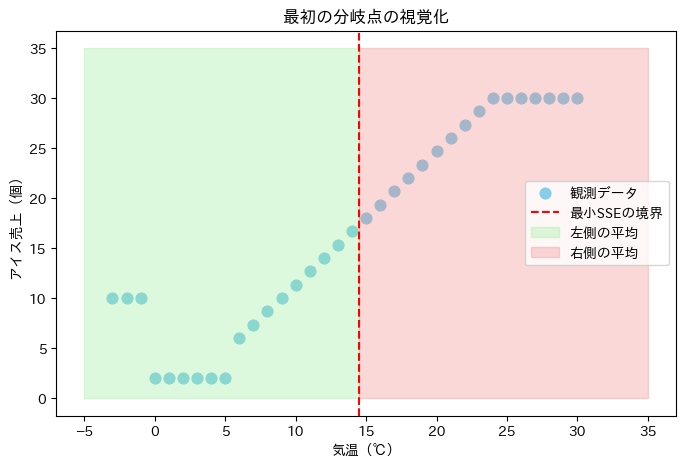

In [236]:
# １つ目の分岐条件を視覚的に理解するための図
plt.figure(figsize=(8,5))
plt.scatter(df['temperature'], df['sales'], color='skyblue', s=60, label='観測データ')
plt.axvline(thresholds[min_index], color='red', linestyle='--', label='最小SSEの境界')
plt.fill_betweenx([0, 35], -5, thresholds[min_index], color='lightgreen', alpha=0.3, label='左側の平均')
plt.fill_betweenx([0, 35], thresholds[min_index], 35, color='lightcoral', alpha=0.3, label='右側の平均')
plt.xlabel('気温（℃）') 
plt.ylabel('アイス売上（個）')
plt.title('最初の分岐点の視覚化')
plt.legend()
plt.show()

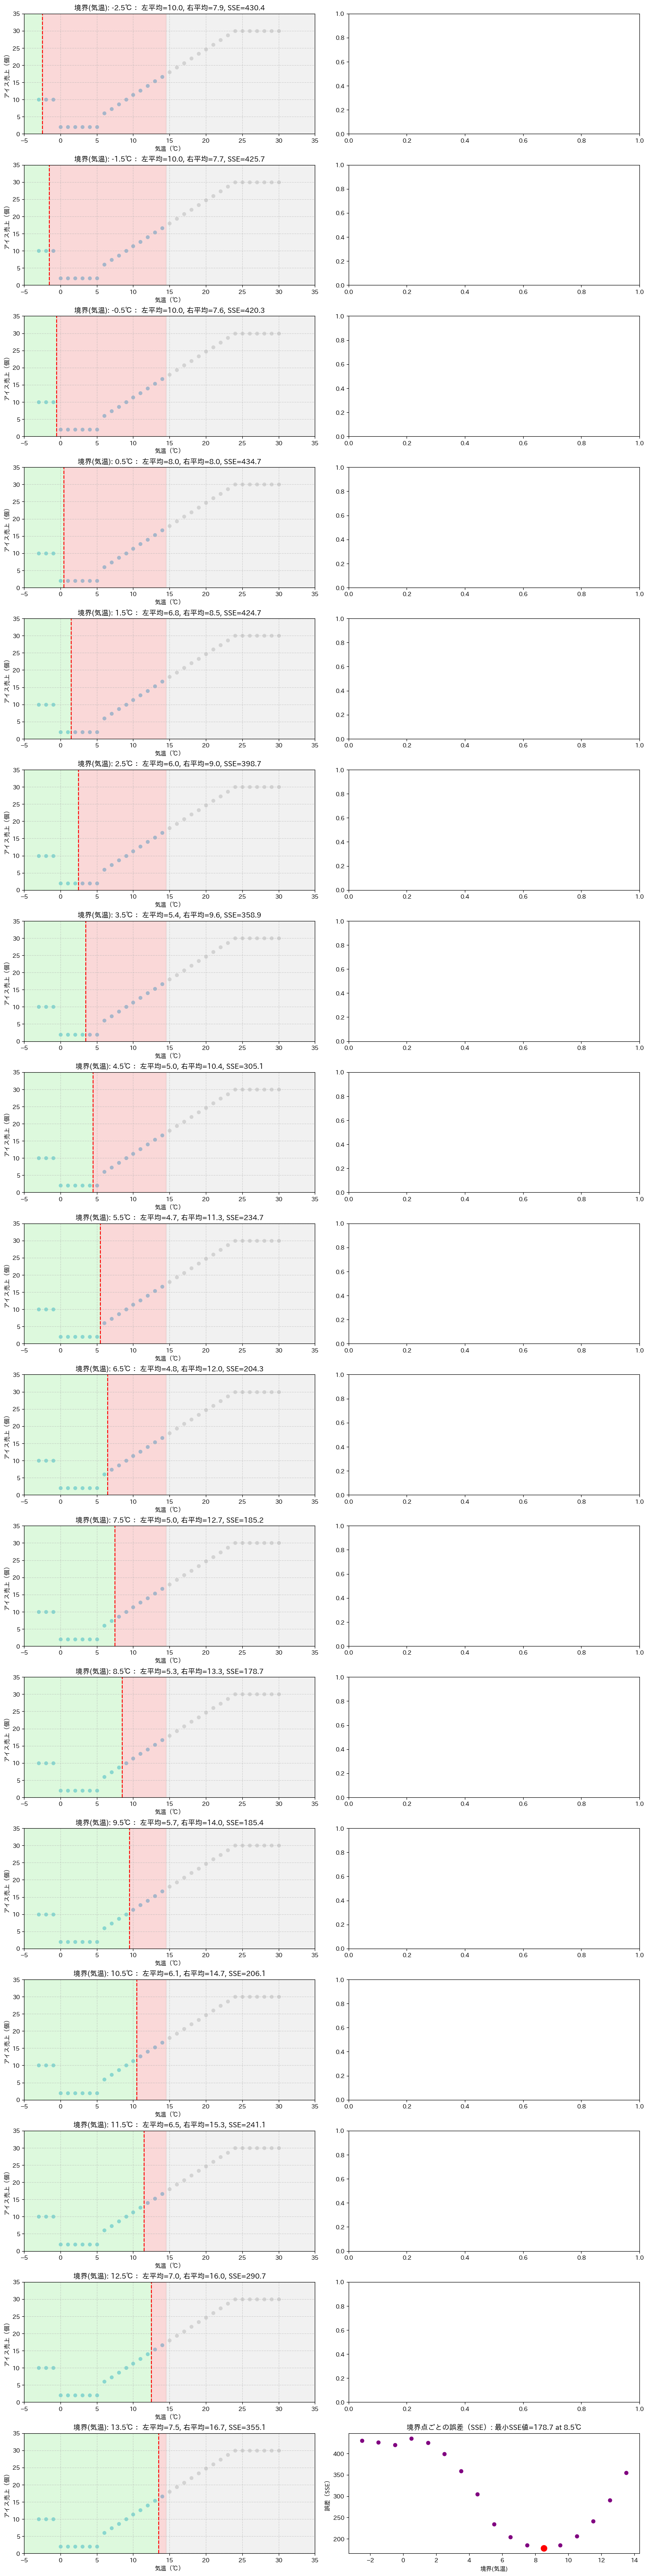

In [237]:
# ２つ目の分岐条件の決定(１つ目の分岐以下)
# １つ目の分岐以下のデータ
df_below = df[df['temperature'] <= thresholds_memo[0]]
# 気温データ数
num_data_below = len(df_below)

fig, ax = plt.subplots(17, 2, figsize=(15, 60), constrained_layout=True)

# 境界点とSSEリスト
thresholds_below = []
SSE_list_below = []
for i in range(num_data_below-1):
    # 図のインデックス
    row = i % 17
    col = i // 17
    ax[row][col].scatter(df_below['temperature'], df_below['sales'], color='skyblue', s=30)
    # 境界点:i番目とi+1番目の気温の中間
    threshold = (df_below['temperature'].values[i] + df_below['temperature'].values[i+1]) / 2
    thresholds_below.append(threshold)
    
    # 境界点に縦線を引く
    ax[row][col].axvline(threshold, color='red', linestyle='--')
    ax[row][col].fill_betweenx([0, 35], -5, threshold, color='lightgreen', alpha=0.3)
    ax[row][col].fill_betweenx([0, 35], threshold, thresholds_memo[0], color='lightcoral', alpha=0.3)
    # 除外したデータをグレーで表示
    ax[row][col].scatter(df[df['temperature'] > thresholds_memo[0]]['temperature'], df[df['temperature'] > thresholds_memo[0]]['sales'], color='lightgray', s=30, label='除外データ')
    ax[row][col].fill_betweenx([0, 35], thresholds_memo[0], 35, color='lightgray', alpha=0.3)

    

    # 軸ラベル
    ax[row][col].set_xlabel('気温（℃）')
    ax[row][col].set_ylabel('アイス売上（個）')
    ax[row][col].set_xlim(-5, 35)
    ax[row][col].set_ylim(0, 35)
    ax[row][col].grid(True, linestyle='--', alpha=0.5)

    
    # 境界別データを分割する
    left_sales = df_below[df_below['temperature'] <= threshold]['sales']
    right_sales = df_below[df_below['temperature'] > threshold]['sales']
    # 平均を求める
    left_mean = left_sales.mean() if not left_sales.empty else 0
    right_mean = right_sales.mean() if not right_sales.empty else 0
    # SSE（Sum of Squared Errors: 合計二乗誤差）
    sse = ((left_sales - left_mean)**2).sum() + ((right_sales - right_mean)**2).sum()
    SSE_list_below.append(sse)
    # タイトルに境界と平均、誤差を表示  

    ax[row][col].set_title(f'境界(気温): {threshold:.1f}℃： 左平均={left_mean:.1f}, 右平均={right_mean:.1f}, SSE={sse:.1f}')

ax[16][1].scatter(thresholds_below, SSE_list_below, color='purple')
#SSE_listの最小値
min_index_below = np.argmin(SSE_list_below)
ax[16][1].scatter(thresholds_below[min_index_below], SSE_list_below[min_index_below], color='red', s=100, label='最小SSE点')
ax[16][1].set_title(f'境界点ごとの誤差（SSE）: 最小SSE値={(min(SSE_list_below)):.1f} at {thresholds_below[min_index_below]:.1f}℃')
ax[16][1].set_ylabel('誤差（SSE）')
ax[16][1].set_xlabel('境界(気温)')
plt.show()
thresholds_memo.append(thresholds_below[min_index_below])


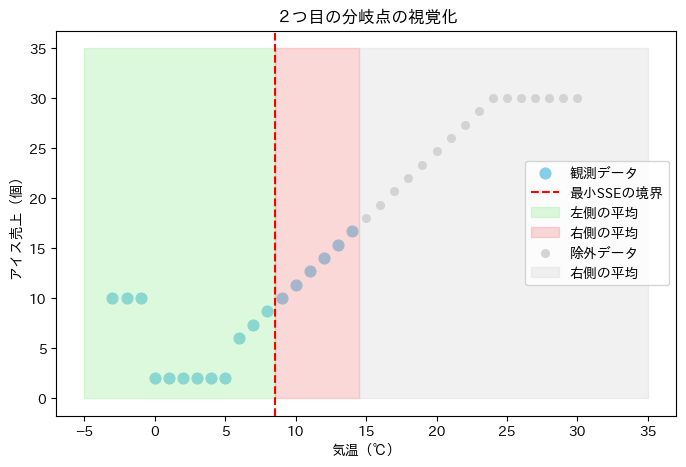

In [238]:
# ２つ目の分岐点の視覚化
plt.figure(figsize=(8,5))
plt.scatter(df_below['temperature'], df_below['sales'], color='skyblue', s=60, label='観測データ')
plt.axvline(thresholds_below[min_index_below], color='red', linestyle='--', label='最小SSEの境界')
plt.fill_betweenx([0, 35], -5, thresholds_below[min_index_below], color='lightgreen', alpha=0.3, label='左側の平均')
plt.fill_betweenx([0, 35], thresholds_below[min_index_below], thresholds_memo[0], color='lightcoral', alpha=0.3, label='右側の平均')
# 除外したデータをグレーで表示
plt.scatter(df[df['temperature'] > thresholds_memo[0]]['temperature'], df[df['temperature'] > thresholds_memo[0]]['sales'], color='lightgray', s=30, label='除外データ')
plt.fill_betweenx([0, 35], thresholds_memo[0], 35, color='lightgray', alpha=0.3, label='右側の平均')
plt.xlabel('気温（℃）') 
plt.ylabel('アイス売上（個）')  
plt.title('２つ目の分岐点の視覚化')
plt.legend()
plt.show()

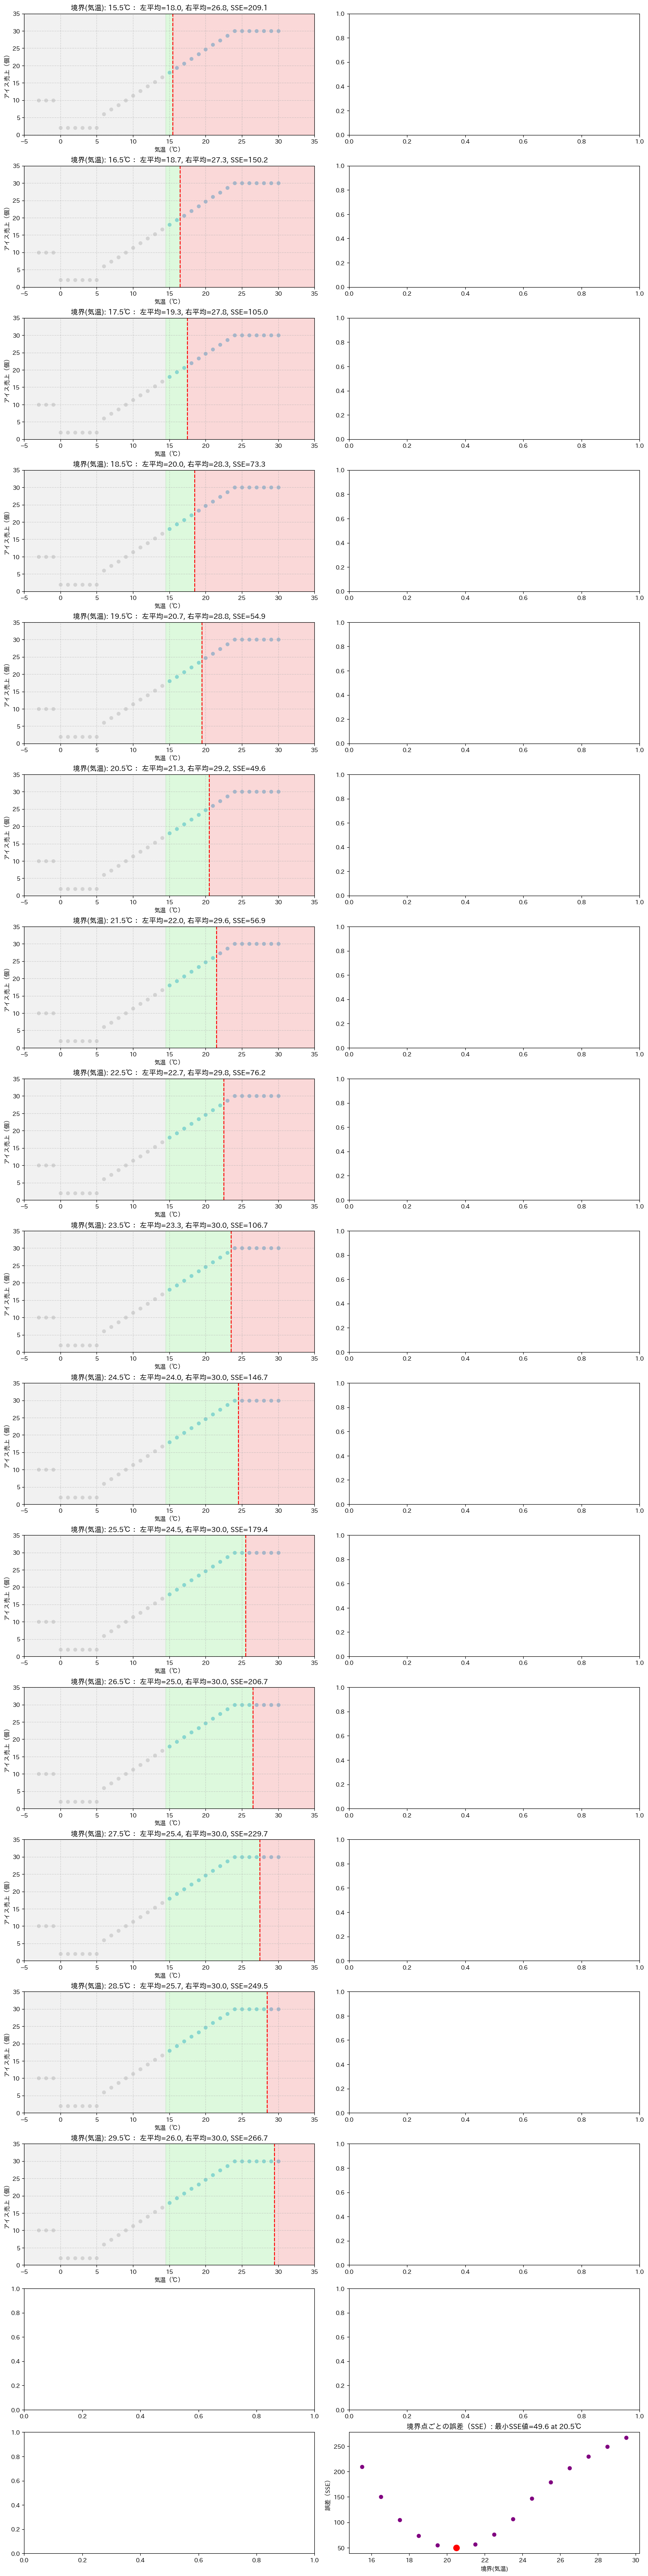

In [239]:
# 3つ目の分岐条件の決定(１つ目の分岐以上)
# 1つ目の分岐以上のデータ

df_above = df[df['temperature'] > thresholds_memo[0]]
# 気温データ数
num_data_above = len(df_above)

fig, ax = plt.subplots(17, 2, figsize=(15, 60), constrained_layout=True)
# 境界点とSSEリスト
thresholds_above = []
SSE_list_above = []
for i in range(num_data_above-1):
    # 図のインデックス
    row = i % 17
    col = i // 17
    ax[row][col].scatter(df_above['temperature'], df_above['sales'], color='skyblue', s=30)
    # 境界点:i番目とi+1番目の気温の中間
    threshold = (df_above['temperature'].values[i] + df_above['temperature'].values[i+1]) / 2
    thresholds_above.append(threshold)
    
    # 境界点に縦線を引く
    ax[row][col].axvline(threshold, color='red', linestyle='--')
    ax[row][col].fill_betweenx([0, 35], thresholds_memo[0], threshold, color='lightgreen', alpha=0.3)
    ax[row][col].fill_betweenx([0, 35], threshold, 35, color='lightcoral', alpha=0.3)
    # 除外したデータをグレーで表示
    ax[row][col].scatter(df[df['temperature'] <= thresholds_memo[0]]['temperature'], df[df['temperature'] <= thresholds_memo[0]]['sales'], color='lightgray', s=30, label='除外データ')
    ax[row][col].fill_betweenx([0, 35], -5, thresholds_memo[0], color='lightgray', alpha=0.3)

    

    # 軸ラベル
    ax[row][col].set_xlabel('気温（℃）')
    ax[row][col].set_ylabel('アイス売上（個）')
    ax[row][col].set_xlim(-5, 35)
    ax[row][col].set_ylim(0, 35)
    ax[row][col].grid(True, linestyle='--', alpha=0.5)

    
    # 境界別データを分割する
    left_sales = df_above[df_above['temperature'] <= threshold]['sales']
    right_sales = df_above[df_above['temperature'] > threshold]['sales']
    # 平均を求める
    left_mean = left_sales.mean() if not left_sales.empty else 0
    right_mean = right_sales.mean() if not right_sales.empty else 0
    # SSE（Sum  of Squared Errors: 合計二乗誤差）
    sse = ((left_sales - left_mean)**2).sum() + ((right_sales - right_mean)**2).sum()
    SSE_list_above.append(sse)
    # タイトルに境界と平均、誤差を表示
    ax[row][col].set_title(f'境界(気温): {threshold:.1f}℃： 左平均={left_mean:.1f}, 右平均={right_mean:.1f}, SSE={sse:.1f}')
ax[16][1].scatter(thresholds_above, SSE_list_above, color='purple')
#SSE_listの最小値
min_index_above = np.argmin(SSE_list_above)
ax[16][1].scatter(thresholds_above[min_index_above], SSE_list_above[min_index_above], color='red', s=100, label='最小SSE点')
ax[16][1].set_title(f'境界点ごとの誤差（SSE）: 最小SSE値={(min(SSE_list_above)):.1f} at {thresholds_above[min_index_above]:.1f}℃')
ax[16][1].set_ylabel('誤差（SSE）')     
ax[16][1].set_xlabel('境界(気温)')
plt.show()
thresholds_memo.append(thresholds_above[min_index_above])


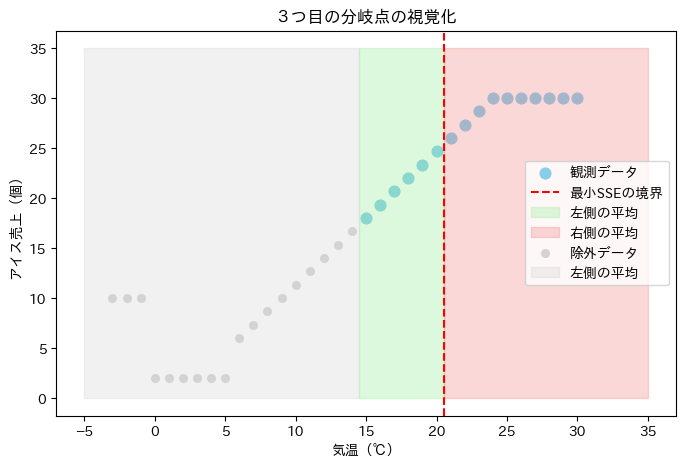

In [240]:
# ３つ目の分岐点の視覚化
plt.figure(figsize=(8,5))
plt.scatter(df_above['temperature'], df_above['sales'], color='skyblue', s=60, label='観測データ')
plt.axvline(thresholds_above[min_index_above], color='red', linestyle='--', label='最小SSEの境界')
plt.fill_betweenx([0, 35], thresholds_memo[0], thresholds_above[min_index_above], color='lightgreen', alpha=0.3, label='左側の平均')
plt.fill_betweenx([0, 35], thresholds_above[min_index_above], 35, color='lightcoral', alpha=0.3, label='右側の平均')
# 除外したデータをグレーで表示
plt.scatter(df[df['temperature'] <= thresholds_memo[0]]['temperature'], df[df['temperature'] <= thresholds_memo[0]]['sales'], color='lightgray', s=30, label='除外データ')
plt.fill_betweenx([0, 35], -5, thresholds_memo[0], color='lightgray', alpha=0.3, label='左側の平均')
plt.xlabel('気温（℃）')
plt.ylabel('アイス売上（個）')
plt.title('３つ目の分岐点の視覚化')
plt.legend()
plt.show()

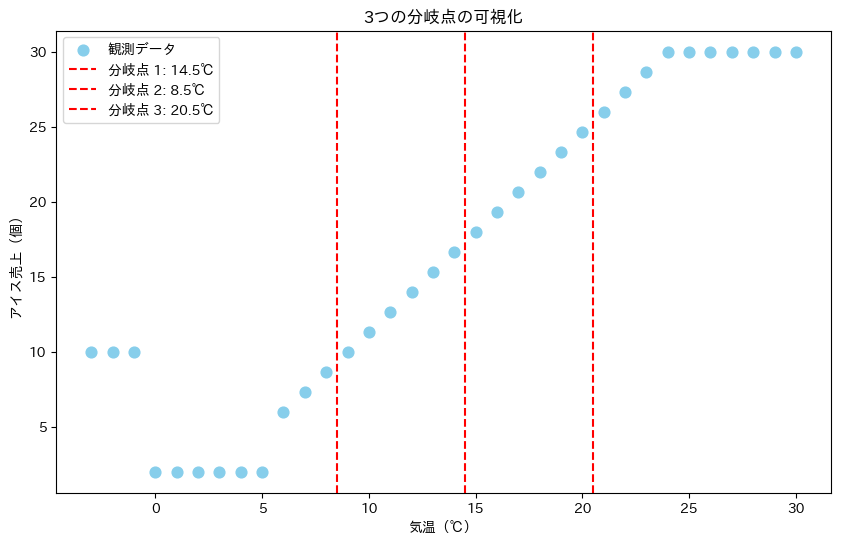

In [241]:
# 3つの分岐点を可視化
plt.figure(figsize=(10,6))
plt.scatter(df['temperature'], df['sales'], color='skyblue', s=60, label='観測データ')
for i, t in enumerate(thresholds_memo):
    plt.axvline(t, color='red', linestyle='--', label=f'分岐点 {i+1}: {t:.1f}℃')    
plt.xlabel('気温（℃）')
plt.ylabel('アイス売上（個）')  
plt.title('3つの分岐点の可視化')
plt.legend()
plt.show()


# 回帰木における深さ（max_depth）について

## 概要
- **深さ（max_depth）** は、回帰木の「根から葉までの最大分割回数」を表すハイパーパラメータ
- 木の深さを調整することで **モデルの複雑さ** を制御できる
- 深さが深いほどデータに細かく適合し、浅いほど滑らかな予測になる

---

## 深さがモデルに与える影響
| 深さ | 特徴 | 予測傾向 |
|------|------|-----------|
| 浅い | 分割が少ない、単純 | データ全体の傾向をざっくり捉える、過少学習になりやすい |
| 深い | 分割が多い、複雑 | 学習データにぴったり適合、過学習になりやすい |

---

## 深さの決定方法
1. **経験則**
   - 小規模データ（サンプル少なめ）：深さ 2～5 程度
   - 大規模データ（サンプル多め）：深さ 10 以上も可能
2. **交差検証（Cross-Validation）**
   - いくつかの深さを試し、検証データで誤差が最小になる深さを選択
3. **最小ノードサイズ（min_samples_leaf）との組み合わせ**
   - 「1つの葉に最低何件必要か」を設定して過学習を防ぐ
   - 深さが深くても、葉の最小サンプル数で制限できる

---

## 教材向けのポイント
- **浅い木** は分岐の仕組みが理解しやすく、ステップ状の予測が視覚的にわかりやすい
- **深い木** は精度は上がるが、ステップが細かくなり見た目や解釈が難しくなる

---

💡 **まとめ**
- max_depth は回帰木の「自由度」を決める重要なハイパーパラメータ
- データの大きさ・ノイズ・解釈性に応じて調整する
- 教材や可視化では浅めの深さを使うと理解しやすい

# 複数特徴量における回帰木の分岐決定

## 概要
- 回帰木は **ノード内の誤差を最小化する** ことを目標に分割を行う
- 複数の特徴量がある場合、**どの特徴量で、どの値で分割するか** を同時に評価して最適な分岐を選ぶ

---

## 分岐決定の手順

1. **候補の特徴量と分割点を列挙**
   - すべての特徴量を順番に調べる
   - 各特徴量の値の間にある中間点などを候補として設定

2. **候補ごとに誤差を計算**
   - 各候補分割でデータを **左ノード・右ノード** に分割
   - ノードごとの平均値を求め、**二乗誤差 (SSE または MSE)** を計算
     ```
     左ノード誤差 + 右ノード誤差 = 分割誤差
     ```

3. **最小誤差の分割を選択**
   - すべての特徴量・分割点候補の中で **分割誤差が最小** になるものを採用
   - この分割がそのノードの「最適な分岐」となる

4. **左右ノードに対して再帰的に分割**
   - 木の深さや最小ノードサイズの条件に達するまで繰り返す

---

## ポイント
- **特徴量の優先度** は自動的に計算される
  - よく分割に使われる特徴量は「重要度が高い」と判断される
- **複数特徴量でも原理は単一特徴量と同じ**
  - ノード内の平均値との差の二乗誤差を最小化する
- **連続値でもカテゴリ値でも同じアルゴリズム**
  - 連続値は範囲で分割
  - カテゴリ値はグループ分けで分割

---

💡 **まとめ**
- 複数特徴量の場合でも、回帰木は **すべての候補分割を評価して誤差最小の分割を選ぶ**
- 分割の順番やどの特徴量が選ばれるかは **データの構造と木の制約（深さ、最小ノードサイズ）** によって決まる
- 教材用には「気温×湿度」など 2 特徴量で **左ノード・右ノードの平均値をステップ状に描く図** がわかりやすい

# 2特徴量の回帰木分岐の可視化

## 概要
- ここでは「気温」と「湿度」の2特徴量でアイス売上を予測する例を考える
- 回帰木は「どの特徴量で、どの値で分割するか」を決める
- 分割ごとに左ノード・右ノードの平均売上を計算し、誤差を最小化する
- 可視化では **分割領域ごとに色を塗る** ことで理解を助ける

In [242]:
# --- ライブラリ ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# --- データ作成（例） ---
np.random.seed(42)
temperature = np.linspace(-3, 30, 34)
humidity = np.linspace(30, 90, 34)
# 売上を温度・湿度の関数で生成（ノイズあり）
sales = np.clip(temperature*0.8 + humidity*0.1 + np.random.randn(34)*2, 0, None)
df = pd.DataFrame({'temperature': temperature, 'humidity': humidity, 'sales': sales})

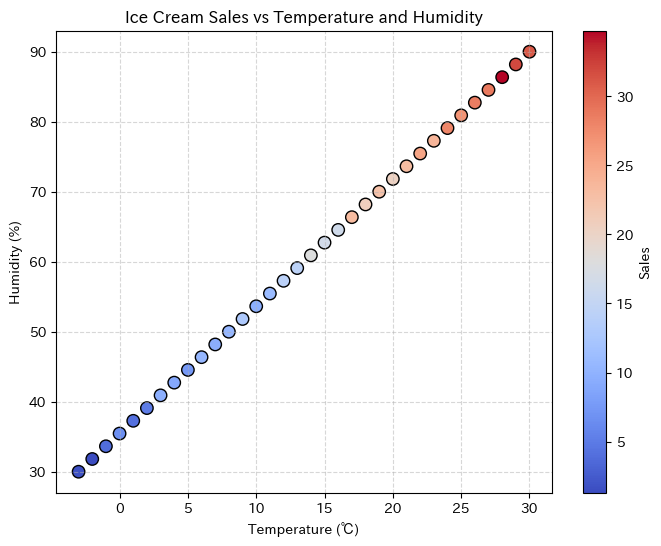

In [243]:
# --- 可視化 ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['temperature'], 
    df['humidity'], 
    c=df['sales'],          # 売上を色で表現
    cmap='coolwarm',        # カラーマップ
    s=80,                   # 点の大きさ
    edgecolor='k'           # 点の縁を黒に
)
plt.colorbar(scatter, label='Sales')  # カラーバー表示
plt.xlabel('Temperature (℃)')
plt.ylabel('Humidity (%)')
plt.title('Ice Cream Sales vs Temperature and Humidity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

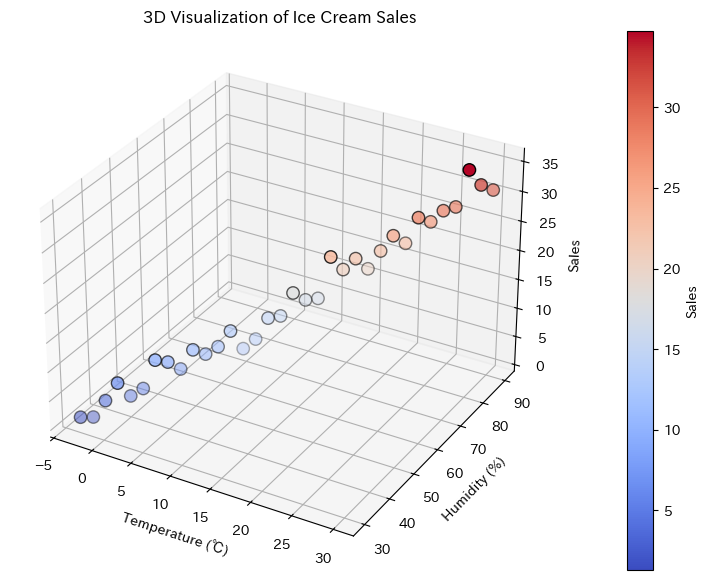

In [246]:
# --- 3Dプロット ---
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 散布図
sc = ax.scatter(
    df['temperature'], 
    df['humidity'], 
    df['sales'],
    c=df['sales'],       # 色も売上で表現
    cmap='coolwarm',
    s=80,
    edgecolor='k'
)

# 軸ラベル
ax.set_xlabel('Temperature (℃)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Sales')
ax.set_title('3D Visualization of Ice Cream Sales')

# カラーバー
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Sales')

plt.show()

c:\Users\tsuki\myrepo\my-analysis-knowledge\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


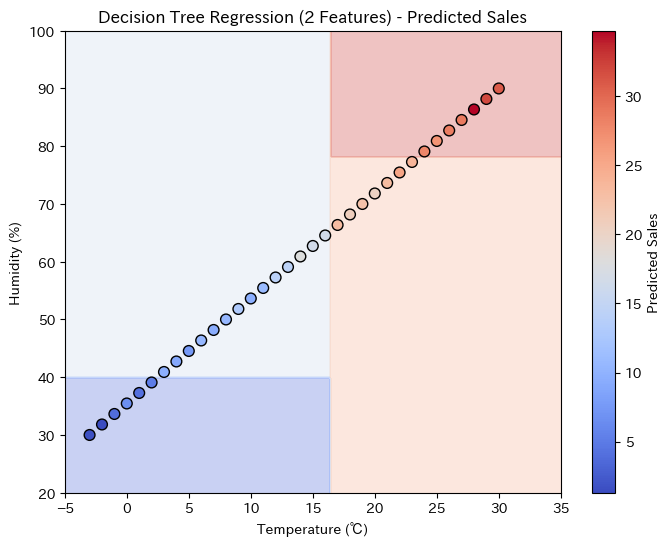

In [ ]:
# --- モデル学習 ---
X = df[['temperature','humidity']]
y = df['sales']
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X, y)

# --- グリッド作成（可視化用） ---
temp_grid = np.linspace(-5, 35, 200)
hum_grid = np.linspace(20, 100, 200)
T, H = np.meshgrid(temp_grid, hum_grid)
grid_points = np.c_[T.ravel(), H.ravel()]
pred = model.predict(grid_points).reshape(T.shape)

# --- 可視化 ---
plt.figure(figsize=(8,6))
# 分割領域の色付け
plt.contourf(T, H, pred, cmap='coolwarm', alpha=0.3)
# 元データ
plt.scatter(df['temperature'], df['humidity'], c=df['sales'], cmap='coolwarm', edgecolor='k', s=60)
plt.xlabel('Temperature (℃)')
plt.ylabel('Humidity (%)')
plt.title('Decision Tree Regression (2 Features) - Predicted Sales')
plt.colorbar(label='Predicted Sales')
plt.show()


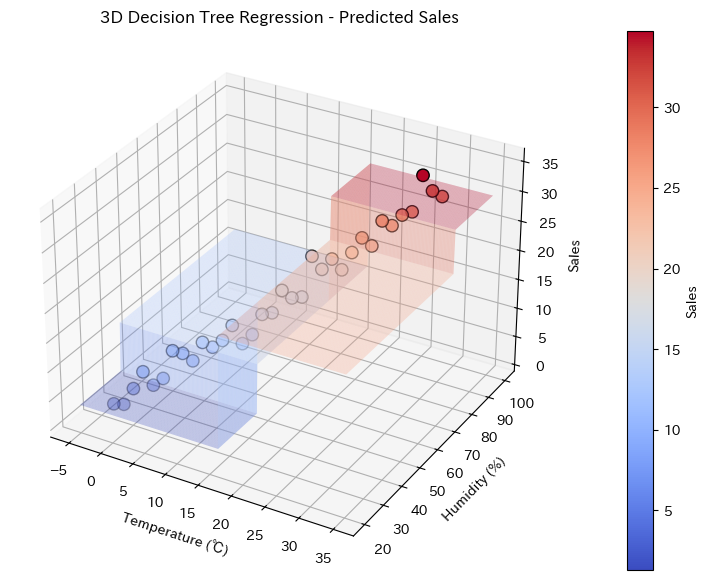

In [249]:
# --- 3D描画 ---
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 回帰面（分割領域）を描画
surf = ax.plot_surface(
    T, H, pred, cmap='coolwarm', alpha=0.3,  # 透明度を下げる
    rstride=1, cstride=1, edgecolor='none'   # 境界線を消す
)

# 元データの散布図
sc = ax.scatter(
    df['temperature'], df['humidity'], df['sales'], 
    c=df['sales'], cmap='coolwarm', edgecolor='k', s=80
)

# 軸ラベル
ax.set_xlabel('Temperature (℃)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Sales')
ax.set_title('3D Decision Tree Regression - Predicted Sales')

# カラーバー（scatter オブジェクトを渡す）
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Sales')

plt.show()
plt.show()

# 回帰木の描画

## 概要
- 学習した回帰木の **分岐条件や葉ノードの平均値** を可視化することで
  - 「どの特徴量で分割されたか」
  - 「各ノードの予測値」
- を直感的に理解できる
- scikit-learn では `plot_tree` や `export_graphviz` を使って描画可能

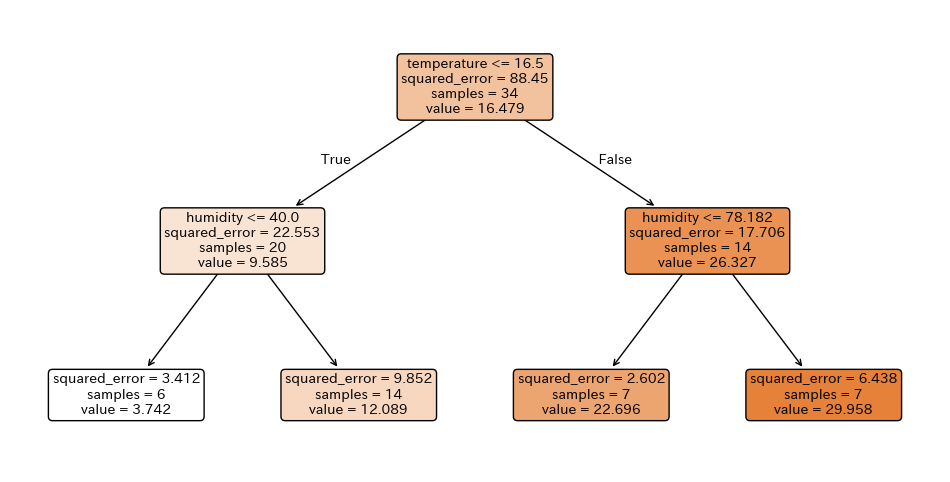

In [245]:
# --- ライブラリ ---
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# --- データ準備（例） ---
import numpy as np
import pandas as pd

np.random.seed(42)
temperature = np.linspace(-3, 30, 34)
humidity = np.linspace(30, 90, 34)
sales = np.clip(temperature*0.8 + humidity*0.1 + np.random.randn(34)*2, 0, None)
df = pd.DataFrame({'temperature': temperature, 'humidity': humidity, 'sales': sales})

X = df[['temperature','humidity']]
y = df['sales']

# --- 回帰木モデル ---
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X, y)

# --- 回帰木の描画 ---
plt.figure(figsize=(12,6))
plot_tree(
    model, 
    feature_names=['temperature','humidity'], 
    filled=True,          # ノードごとに色を付ける
    rounded=True,         # ノードの角を丸くする
    fontsize=10
)
plt.show()


# 回帰木における特徴量の選択と分割

## 概要
- 複数の特徴量がある場合、回帰木はどの特徴量で分割するかも自動で決定する
- 基本ルールは **「最も誤差を減らせる分割を選ぶ」** こと

---

## 手順（直感的に理解）

1. **候補の閾値をリストアップ**
   - 各特徴量ごとに、データの値の間の中点を候補として設定

2. **特徴量ごとに全候補のSSEを計算**
   - 値 ≤ 閾値 → 左ノード
   - 値 > 閾値 → 右ノード
   - 左右ノードの平均を計算
   - SSE = 左ノードの二乗誤差 + 右ノードの二乗誤差
   - → **「この閾値で分割した場合の予測誤差」** がわかる

3. **特徴量ごとの最小SSEを比較**
   - 各特徴量で最小SSEを記録
   - 最もSSEが小さい特徴量と閾値を採用

4. **分割を決定**
   - この特徴量・閾値でノードを分割
   - 子ノードに対して同じ手順を再帰的に繰り返す

---

## 🔹 ポイント
- 「全候補のSSEを計算」とは、**試し割りして誤差を確認する作業**  
- 回帰木は、1ステップごとに「最も誤差を減らせる特徴量・閾値」を選ぶ  
- 視覚的には「特徴量ごとに境界を試し、誤差の棒グラフを作って最小値を選ぶ」イメージ

---

## 分割候補とSSEの例（複数特徴量の場合）

### 特徴量1：気温（Temperature）

| 候補閾値 | SSE |
|-----------|-----|
| 0         | 50  |
| 5         | 40  |
| 10        | 30  |
| 15        | 45  |

### 特徴量2：湿度（Humidity）

| 候補閾値 | SSE |
|-----------|-----|
| 40        | 60  |
| 50        | 35  |
| 60        | 45  |
| 70        | 50  |

### 最適分割の選択
- 最小SSE = 30 → 特徴量1（気温）で閾値10を採用



## ステップ2：各子ノードでの分割候補

### 左ノード（Temperature ≤ 10℃）の候補

| 特徴量 | 閾値 | 左ノード平均売上 | 右ノード平均売上 | SSE |
|--------|------|-----------------|-----------------|-----|
| 気温   | 5    | 4               | 7               | 20  |
| 湿度   | 50   | 5               | 6               | 18  |

→ **最小SSEは湿度50** → 左ノードは湿度50で分割

### 右ノード（Temperature > 10℃）の候補

| 特徴量 | 閾値 | 左ノード平均売上 | 右ノード平均売上 | SSE |
|--------|------|-----------------|-----------------|-----|
| 気温   | 20   | 15              | 25              | 30  |
| 湿度   | 70   | 18              | 28              | 35  |

→ **最小SSEは気温20** → 右ノードは気温20で分割

---

## 🔹 解説
1. **深さ2では各子ノードに分けて再計算**
   - 左ノード、右ノードそれぞれで候補閾値を試す
2. **SSEが最小の閾値を選択**
   - 左ノード：湿度50
   - 右ノード：気温20
3. **再帰的に分割**
   - 次の深さ（深さ3）でも同じ手順を繰り返す
4. **葉ノード**
   - 最終的に各葉ノードには平均売上が割り当てられる  
   - これが回帰木の予測値となる

---

- これで **深さ2の分割例** が直感的に理解できる
